# **CONJOINT ANALYSIS**

Conjoint Analysis is a marketing research technique used to understand how consumers evaluate and choose products based on various characteristics (attributes and levels). The goal is to measure the value that consumers place on each attribute, helping companies design products that better align with market preferences.

In this context, our analysis specifically aims to evaluate whether the introduction of a B2C product (**fish skewer**) would be viable for MarePiù, given that the company currently operates primarily in the B2B market. By exploring consumer preferences through Conjoint Analysis, we can gain detailed insights into which combinations of attributes (e.g., type of fish, preparation method, type of breading) are most appreciated by consumers. 

In [73]:
suppressMessages(library(radiant))
suppressMessages(library(tidyverse))
suppressMessages(library(ggplot2))
suppressMessages(library(dplyr))
suppressMessages(library(tidyr))
suppressMessages(library(gridExtra))
suppressMessages(library(reshape2))
suppressMessages(library(readxl))
#No errors during the package loading -> suppressMessages() function to avoid displaying the warning, ensuring a smoother flow of the notebook.

---


## **1. Data collection**

To collect the data, we designed a survey using Google Forms and distributed it via a link to our family and friends.

The questionnaire consists of three sections:  
- The first section gathers **demographic information** such as age, education level, and other relevant details.  
- The second section explores **consumption habits**, focusing on the frequency of fish consumption, both in general and specifically for frozen fish.  
- The core part of the survey, designed for the conjoint analysis, asks respondents to **evaluate in a range 0 to 10 different fish skewers** based on various attributes (e.g., cooking time, type of fish, etc.).

We collected a total of **122 responses**, of which **95 were from frozen fish consumers** who provided the required evaluations for the analysis.

---

### **1.1.  Product Selection and Attribute Definition**

The product was selected for the conjoint analysis because the company under consideration offers fish skewers in various types for the **B2B** market. Our objective is to identify the best combination of attributes to introduce into the **B2C** market.

To achieve this, we selected certain characteristics already listed on the **Marepiù** website and used them as attributes for the study.  

Additionally, we incorporated other characteristics based on insights from our previous **segmentation analysis**, which highlighted the necessity for diversification in **packaging format** and **cooking time**. Given these findings, we decided to include them in the conjoint analysis.

The **price** was excluded from the study because we lacked information on the company's production costs. Using generic price ranges (e.g., high, medium, low) would not have provided meaningful or actionable insights for the conjoint analysis.


Attributes and Levels:
- **Panatura** (nessuna, panko, gratinati)
- **Tipo di pesce** (gambero, salmone, calamaro)
- **Tempo di preparazione** (meno di 8 min, tra 8 e 15 min, più di 15 min)
- **Formato confezione** (monoporzione, doppia porzione, formato famiglia)
- **Spezie** (nessuna, prezzemolo e basilico, salvia e rosmarino)

---

### **1.1. Bundles' Choice**

To determine **how many** and **which** bundles to include in the survey, we used the DOE (Design of Experiments) function, which helps generate random combinations of attributes and understand the optimal number of bundles to propose, in order to avoid overwhelming the respondents.

In [2]:
data.attribute1 <- "Panatura; Nessuna; Panko; Gratinati"
data.attribute2 <- "Tipo di pesce; Gambero; Salmone; Calamaro"
data.attribute3 <- "Tempo di Preparazione; Meno di 8; Tra 8 e 15; Più di 15"
data.attribute4 <- "Formato confezione; monoporzione; doppia porzione; formato famiglia"
data.attribute5 <- 'Spezie; Nessuna; Prezzemolo e Basilico; Salvia e Rosmarino'


data.attributes <- c(data.attribute1, data.attribute2, data.attribute3, data.attribute4, data.attribute5)

In [3]:
summary(doe(data.attributes, seed = 42))

Experimental design
# trials for partial factorial: 18 
# trials for full factorial   : 243 
Random seed                   : 42 

Attributes and levels:
Panatura: Nessuna, Panko, Gratinati 
Tipo_di_pesce: Gambero, Salmone, Calamaro 
Tempo_di_Preparazione: Meno_di_8, Tra_8_e_15, Più_di_15 
Formato_confezione: monoporzione, doppia_porzione, formato_famiglia 
Spezie: Nessuna, Prezzemolo_e_Basilico, Salvia_e_Rosmarino 

Design efficiency:
 Trials D-efficiency Balanced
     11        0.554    FALSE
     12        0.731     TRUE
     13        0.651    FALSE
     14        0.704    FALSE
     15        0.653     TRUE
     16        0.703    FALSE
     17        0.352    FALSE
     18        1.000     TRUE

Partial factorial design correlations:
** Note: Variables are assumed to be ordinal **
                      Panatura Tipo_di_pesce Tempo_di_Preparazione
Panatura                     1             0                     0
Tipo_di_pesce                0             1                     0
Te

The optimal number of bundles to propose was found to be **18**, as it corresponds to a D-efficiency of 1, meaning that the selection of bundles is balanced and complete when describing different attributes:

In [4]:
design_efficiency <- data.frame(
  Trials = c(11, 12, 13, 14, 15, 16, 17, 18),
  D_efficiency = c(0.554, 0.731, 0.651, 0.704, 0.653, 0.703, 0.352, 1.000),
  Balanced = c(FALSE, TRUE, FALSE, FALSE, TRUE, FALSE, FALSE, TRUE)
)

design_efficiency

Trials,D_efficiency,Balanced
<dbl>,<dbl>,<lgl>
11,0.554,FALSE
12,0.731,TRUE
13,0.651,FALSE
14,0.704,FALSE
15,0.653,TRUE
16,0.703,FALSE
17,0.352,FALSE
18,1.000,TRUE


Now, we proceed with the exact identification of the 18 bundles.

In [5]:
summary(doe(data.attributes, seed = 42, trials = 18))

Experimental design
# trials for partial factorial: 18 
# trials for full factorial   : 243 
Random seed                   : 42 

Attributes and levels:
Panatura: Nessuna, Panko, Gratinati 
Tipo_di_pesce: Gambero, Salmone, Calamaro 
Tempo_di_Preparazione: Meno_di_8, Tra_8_e_15, Più_di_15 
Formato_confezione: monoporzione, doppia_porzione, formato_famiglia 
Spezie: Nessuna, Prezzemolo_e_Basilico, Salvia_e_Rosmarino 

Design efficiency:
 Trials D-efficiency Balanced
     18        1.000     TRUE

Partial factorial design correlations:
** Note: Variables are assumed to be ordinal **
                      Panatura Tipo_di_pesce Tempo_di_Preparazione
Panatura                     1             0                     0
Tipo_di_pesce                0             1                     0
Tempo_di_Preparazione        0             0                     1
Formato_confezione           0             0                     0
Spezie                       0             0                     0
           

These are the 18 bundles to which the respondents will need to assign a rating from 1 to 10 in the questionnaire:

In [6]:
bundles <- data.frame(
  Panatura = c("Nessuna", "Nessuna", "Nessuna", "Nessuna", "Nessuna", "Nessuna", "Panko", "Panko", "Panko", "Panko", "Panko", "Panko", "Gratinati", "Gratinati", "Gratinati", "Gratinati", "Gratinati", "Gratinati"),
  Tipo_di_pesce = c("Gambero", "Gambero", "Salmone", "Salmone", "Calamaro", "Calamaro", "Gambero", "Gambero", "Salmone", "Salmone", "Calamaro", "Calamaro", "Gambero", "Gambero", "Salmone", "Salmone", "Calamaro", "Calamaro"),
  Tempo_di_Preparazione = c("Meno_di_8", "Tra_8_e_15", "Meno_di_8", "Più_di_15", "Tra_8_e_15", "Più_di_15", "Meno_di_8", "Più_di_15", "Tra_8_e_15", "Più_di_15", "Meno_di_8", "Tra_8_e_15", "Tra_8_e_15", "Più_di_15", "Meno_di_8", "Tra_8_e_15", "Meno_di_8", "Più_di_15"),
  Formato_confezione = c("formato_famiglia", "doppia_porzione", "monoporzione", "monoporzione", "formato_famiglia", "doppia_porzione", "doppia_porzione", "formato_famiglia", "formato_famiglia", "doppia_porzione", "monoporzione", "monoporzione", "monoporzione", "monoporzione", "formato_famiglia", "doppia_porzione", "doppia_porzione", "formato_famiglia"),
  Spezie = c("Nessuna", "Nessuna", "Nessuna", "Nessuna", "Nessuna", "Nessuna", "Salvia_e_Rosmarino", "Prezzemolo_e_Basilico", "Salvia_e_Rosmarino", "Prezzemolo_e_Basilico", "Salvia_e_Rosmarino", "Prezzemolo_e_Basilico", "Salvia_e_Rosmarino", "Prezzemolo_e_Basilico", "Salvia_e_Rosmarino", "Nessuna", "Nessuna", "Prezzemolo_e_Basilico")
)

bundles

Panatura,Tipo_di_pesce,Tempo_di_Preparazione,Formato_confezione,Spezie
<chr>,<chr>,<chr>,<chr>,<chr>
Nessuna,Gambero,Meno_di_8,formato_famiglia,Nessuna
Nessuna,Gambero,Tra_8_e_15,doppia_porzione,Nessuna
Nessuna,Salmone,Meno_di_8,monoporzione,Nessuna
Nessuna,Salmone,Più_di_15,monoporzione,Nessuna
Nessuna,Calamaro,Tra_8_e_15,formato_famiglia,Nessuna
Nessuna,Calamaro,Più_di_15,doppia_porzione,Nessuna
Panko,Gambero,Meno_di_8,doppia_porzione,Salvia_e_Rosmarino
Panko,Gambero,Più_di_15,formato_famiglia,Prezzemolo_e_Basilico
Panko,Salmone,Tra_8_e_15,formato_famiglia,Salvia_e_Rosmarino


---

## **2. Data Pre-Processing**

In [72]:
#The answers of the questionnaire are imported
file_csv <- "data/conjoint_rawdata.csv"
survey_raw <- read.csv(file_csv)
survey_raw

Informazioni.cronologiche,In.che.genere.ti.identifichi.,Qual.è.la.tua.età.,Qual.è.la.tua.occupazione.,Da.quante.persone.è.composto.il.tuo.nucleo.familiare.,Dove.abiti.al.momento.,Quanto.spesso.consumi.pesce.,In.media..quante.delle.volte.che.consumi.pesce..il.pesce.è.surgelato.,Che.tipo.di.pesce.surgelato.consumi...Puoi.selezionare.più.risposte.,Hai.una.marca.di.fiducia.per.l.acquisto.di.prodotti.di.pesce.surgelati.,⋯,X10..Spiedino.di.Salmone.croccanti.al.Panko.e.con.Prezzemolo.e.Basilico..pronto.in.più.di.15.minuti.e.venduto.in.confezioni.per.due.persone,X11..Spiedino.di.Calamaro.croccanti.al.Panko.e.con.Salvia.e.Rosmarino..pronto.in.meno.di.8.minuti.e.venduto.in.monoporzioni,X12..Spiedino.di.Calamaro.croccanti.al.Panko.e.con.nessuna.spezia..pronto.in.8.15.minuti.e.venduto.in.monoporzioni,X13..Spiedino.di.Gambero.Gratinato.con.Prezzemolo.e.Basilico..pronto.in.8.15.minuti.e.venduto.in.monoporzioni,X14..Spiedino.di.Gambero.Gratinato.con.Salvia.e.Rosmarino..pronto.in.più.di.15.minuti.e.venduto.in.monoporzioni,X15..Spiedino.di.Salmone.Gratinato.con.Salvia.e.Rosmarino..pronto.in.meno.di.8.minuti.e.venduto.in.confezioni.famiglia,X16..Spiedino.di.Salmone.Gratinato.con.nessuna.spezia..pronto.in.8.15.minuti.e.venduto.in.confezioni.per.due.persone,X17..Spiedino.di.Calamaro.Gratinato.con.nessuna.spezia..pronto.in.meno.di.8.minuti.e.venduto.in.confezioni.per.due.persone,X18..Spiedino.di.Calamaro.Gratinato.con.Prezzemolo.e.Basilico..pronto.in.più.di.15.minuti.e.venduto.in.confezioni.famiglia,Quali.sono.le.caratteristiche.che.hanno.influenzato.di.più.la.tua.valutazione...Puoi.selezionare.più.risposte.
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
2025/01/24 10:32:13 AM CET,Femminile,18-25,Studente,2-4,Nord Italia,Una volta a settimana,Poche volte,Piatti pronti;Tranci/Filetti di pesce,No,⋯,9,8,2,8,7,2,8,3,4,Tipo di pesce utilizzato per lo spiedino surgelato;Presenza e tipo di panatura
2025/01/24 10:33:56 AM CET,Femminile,18-25,Lavoratore,4+,Nord Italia,Mai,,,,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,
2025/01/24 10:52:44 AM CET,Maschile,18-25,Studente,2-4,Nord Italia,Una volta a settimana,Poche volte,Piatti pronti,Si,⋯,7,10,9,8,8,7,8,10,9,Tipo di pesce utilizzato per lo spiedino surgelato;Presenza e tipo di panatura;Presenza e combinazione di spezie
2025/01/24 11:58:14 AM CET,Femminile,60-70,Lavoratore,1,Nord Italia,Una/due volte al mese,Spesso,Condimenti per pasta o riso;Tranci/Filetti di pesce,No,⋯,8,4,2,10,10,1,8,3,0,Tipo di pesce utilizzato per lo spiedino surgelato;Formato confezione
2025/01/24 11:59:33 AM CET,Maschile,26-35,Lavoratore,1,Nord Italia,Più volte a settimana,Spesso,Condimenti per pasta o riso;Tranci/Filetti di pesce,No,⋯,7,6,6,5,5,9,7,7,9,Tipo di pesce utilizzato per lo spiedino surgelato;Presenza e tipo di panatura;Formato confezione
2025/01/24 12:48:20 PM CET,Femminile,60-70,Lavoratore,2-4,Sud Italia e Isole,Più volte a settimana,Spesso,Condimenti per pasta o riso;,Si,⋯,6,8,6,7,6,7,5,8,8,Tipo di pesce utilizzato per lo spiedino surgelato;Presenza e tipo di panatura;Tempo di preparazione
2025/01/24 2:43:49 PM CET,Femminile,46-60,Lavoratore,4+,Nord Italia,Una volta a settimana,Poche volte,Tranci/Filetti di pesce,No,⋯,10,10,10,10,10,10,10,10,10,Tipo di pesce utilizzato per lo spiedino surgelato;Tempo di preparazione
2025/01/24 3:18:26 PM CET,Femminile,26-35,Studente,1,Nord Italia,Più volte a settimana,Spesso,Tranci/Filetti di pesce,No,⋯,6,8,8,6,8,9,9,9,6,Presenza e tipo di panatura;Presenza e combinazione di spezie
2025/01/24 4:11:43 PM CET,Femminile,26-35,Lavoratore,2-4,Nord Italia,Una volta a settimana,Poche volte,Tranci/Filetti di pesce,No,⋯,4,4,2,2,2,2,8,6,2,Tipo di pesce utilizzato per lo spiedino surgelato;Tempo di preparazione;Formato confezione


---

#### **2.1. Data Manipulation**

We removed useless columns...

In [8]:
survey_raw <- survey_raw[, !colnames(survey_raw) %in% c("Informazioni.cronologiche")]

.. and renamed the remaining ones in order to simplify the analysis.

In [9]:
renamed_col <- c(
  'In.che.genere.ti.identifichi.' = 'gender',
  'Qual.è.la.tua.età.' = 'age',
  'Qual.è.la.tua.occupazione.' = 'occupation',
  'Da.quante.persone.è.composto.il.tuo.nucleo.familiare.' = 'family_size',
  'Dove.abiti.al.momento.' = 'location',
  'Quanto.spesso.consumi.pesce.' = 'fish_consumption_frequency',
  'In.media..quante.delle.volte.che.consumi.pesce..il.pesce.è.surgelato.' = 'frozen_fish_consumption_frequency',
  'Che.tipo.di.pesce.surgelato.consumi...Puoi.selezionare.più.risposte.' = 'frozen_fish_type',
  'Hai.una.marca.di.fiducia.per.l.acquisto.di.prodotti.di.pesce.surgelati.' = 'trusted_brand',
  'Quali.caratteristiche.di.una.marca.ti.portano.a.sceglierla.come.la.tua.marca.di.fiducia..' = 'reason_to_trust',
  'Tendi.ad.acquistare.sempre.il.prodotto.di.pesce.surgelato.più.economico.' = 'buy_cheapest_frozen_fish',
  'Qual.è.la.ragione.principale.per.cui.non.consumi.pesce.' = 'reason_to_not_consume',
  'A.quali.condizioni.considereresti.l.acquisto.di.prodotti.di.pesce.surgelati.' = 'conditions_to_consume',
  'X1..Spiedino.di.Gambero.con.nessuna.panatura.e.nessuna.spezia..pronto.in.meno.di.8.minuti.e.venduto.in.confezioni.famiglia' = 'Gambero_Nessuna_Nessuna_MenoDi8_Famiglia',
  'X2..Spiedino.di.Gambero.con.nessuna.panatura.ma.con.Salvia.e.Rosmarino..pronto.in.8.15.minuti.e.venduto.in.confezioni.per.2.persone' = 'Gambero_Nessuna_SalviaRosmarino_8-15_Doppia',
  'X3..Spiedino.di.salmone.con.nessuna.panatura.ma.con.Prezzemolo.e.Basilico..pronto.in.meno.di.8.minuti.e.venduto.in.monoporzioni' = 'Salmone_Nessuna_PrezzemoloBasilico_MenoDi8_Mono',
  'X4..Spiedino.di.Salmone.con.nessuna.panatura.e.nessuna.spezia..pronto.in.Più.di.15.minuti.e.venduto.in.Monoporzioni' = 'Salmone_Nessuna_Nessuna_PiùDi15_Mono',
  'X5..Spiedino.di.Calamaro.con.Nessuna.panatura.ma.con.Prezzemolo.e.Basilico..pronto.in.8.15.minuti.e.venduto.in.confezioni.famiglia' = 'Calamaro_Nessuna_PrezzemoloBasilico_8-15_Famiglia',
  'X6..Spiedino.di.Calamaro.con.nessuna.panatura.ma.con.Salvia.e.Rosmarino..pronto.in.più.di.15.minuti.e.venduto.in.confezioni.da.due.persone' = 'Calamaro_Nessuna_SalviaRosmarino_PiùDi15_Doppia',
  'X7..Spiedino.di.Gambero.croccanti.al.Panko.e.con.Prezzemolo.e.Basilico..pronto.in.meno.di.8.minuti.e.venduto.in.confezioni.per.due.persone.NB..La.panatura..Panko..è.fatto.con.la.sola.mollica.di.pane.bianco.e.rende.le.fritture.particolarmente.croccanti' = 'Gambero_Panko_PrezzemoloBasilico_MenoDi8_Doppia',
  'X8..Spiedino.di.Gambero.croccanti.al.Panko.e.nessuna.spezia..pronto.in.più.di.15.minuti.e.venduto.in.confezioni.famiglia' = 'Gambero_Panko_Nessuna_PiùDi15_Famiglia',
  'X9..Spiedino.di..Salmone.croccanti.al.Panko.e.con.Salvia.e.Rosmarino..pronto.in.8.15.minuti.e.venduto.in.confezioni.famiglia' = 'Salmone_Panko_SalviaRosmarino_8-15_Famiglia',
  'X10..Spiedino.di.Salmone.croccanti.al.Panko.e.con.Prezzemolo.e.Basilico..pronto.in.più.di.15.minuti.e.venduto.in.confezioni.per.due.persone' = 'Salmone_Panko_PrezzemoloBasilico_PiùDi15_Doppia',
  'X11..Spiedino.di.Calamaro.croccanti.al.Panko.e.con.Salvia.e.Rosmarino..pronto.in.meno.di.8.minuti.e.venduto.in.monoporzioni' = 'Calamaro_Panko_SalviaRosmarino_MenoDi8_Mono',
  'X12..Spiedino.di.Calamaro.croccanti.al.Panko.e.con.nessuna.spezia..pronto.in.8.15.minuti.e.venduto.in.monoporzioni' = 'Calamaro_Panko_Nessuna_8-15_Mono',
  'X13..Spiedino.di.Gambero.Gratinato.con.Prezzemolo.e.Basilico..pronto.in.8.15.minuti.e.venduto.in.monoporzioni' = 'Gambero_Gratinato_PrezzemoloBasilico_8-15_Mono',
  'X14..Spiedino.di.Gambero.Gratinato.con.Salvia.e.Rosmarino..pronto.in.più.di.15.minuti.e.venduto.in.monoporzioni' = 'Gambero_Gratinato_SalviaRosmarino_PiùDi15_Mono',
  'X15..Spiedino.di.Salmone.Gratinato.con.Salvia.e.Rosmarino..pronto.in.meno.di.8.minuti.e.venduto.in.confezioni.famiglia' = 'Salmone_Gratinato_SalviaRosmarino_MenoDi8_Famiglia',
  'X16..Spiedino.di.Salmone.Gratinato.con.nessuna.spezia..pronto.in.8.15.minuti.e.venduto.in.confezioni.per.due.persone' = 'Salmone_Gratinato_Nessuna_8-15_Doppia',
  'X17..Spiedino.di.Calamaro.Gratinato.con.nessuna.spezia..pronto.in.meno.di.8.minuti.e.venduto.in.confezioni.per.due.persone' = 'Calamaro_Gratinato_Nessuna_MenoDi8_Doppia',
  'X18..Spiedino.di.Calamaro.Gratinato.con.Prezzemolo.e.Basilico..pronto.in.più.di.15.minuti.e.venduto.in.confezioni.famiglia' = 'Calamaro_Gratinato_PrezzemoloBasilico_PiùDi15_Famiglia',
  'Quali.sono.le.caratteristiche.che.hanno.influenzato.di.più.la.tua.valutazione...Puoi.selezionare.più.risposte.' = 'major_influences'
)

colnames(survey_raw) <- renamed_col[colnames(survey_raw)]

In [10]:
# Adjusted dataset
head(survey_raw)

,gender,age,occupation,family_size,location,fish_consumption_frequency,frozen_fish_consumption_frequency,frozen_fish_type,trusted_brand,reason_to_trust,⋯,Salmone_Panko_PrezzemoloBasilico_PiùDi15_Doppia,Calamaro_Panko_SalviaRosmarino_MenoDi8_Mono,Calamaro_Panko_Nessuna_8-15_Mono,Gambero_Gratinato_PrezzemoloBasilico_8-15_Mono,Gambero_Gratinato_SalviaRosmarino_PiùDi15_Mono,Salmone_Gratinato_SalviaRosmarino_MenoDi8_Famiglia,Salmone_Gratinato_Nessuna_8-15_Doppia,Calamaro_Gratinato_Nessuna_MenoDi8_Doppia,Calamaro_Gratinato_PrezzemoloBasilico_PiùDi15_Famiglia,major_influences
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
1,Femminile,18-25,Studente,2-4,Nord Italia,Una volta a settimana,Poche volte,Piatti pronti;Tranci/Filetti di pesce,No,,⋯,9,8,2,8,7,2,8,3,4,Tipo di pesce utilizzato per lo spiedino surgelato;Presenza e tipo di panatura
2,Femminile,18-25,Lavoratore,4+,Nord Italia,Mai,,,,,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,
3,Maschile,18-25,Studente,2-4,Nord Italia,Una volta a settimana,Poche volte,Piatti pronti,Si,Gusto e convenienza,⋯,7,10,9,8,8,7,8,10,9,Tipo di pesce utilizzato per lo spiedino surgelato;Presenza e tipo di panatura;Presenza e combinazione di spezie
4,Femminile,60-70,Lavoratore,1,Nord Italia,Una/due volte al mese,Spesso,Condimenti per pasta o riso;Tranci/Filetti di pesce,No,,⋯,8,4,2,10,10,1,8,3,0,Tipo di pesce utilizzato per lo spiedino surgelato;Formato confezione
5,Maschile,26-35,Lavoratore,1,Nord Italia,Più volte a settimana,Spesso,Condimenti per pasta o riso;Tranci/Filetti di pesce,No,,⋯,7,6,6,5,5,9,7,7,9,Tipo di pesce utilizzato per lo spiedino surgelato;Presenza e tipo di panatura;Formato confezione
6,Femminile,60-70,Lavoratore,2-4,Sud Italia e Isole,Più volte a settimana,Spesso,Condimenti per pasta o riso;,Si,"Il sapore,la consistenza",⋯,6,8,6,7,6,7,5,8,8,Tipo di pesce utilizzato per lo spiedino surgelato;Presenza e tipo di panatura;Tempo di preparazione


---

### **2.2. EDA Analysis**

Some exploratory data analysis to visualize the distribution of answers for demographic and consumption habit variables.

#### **2.2.1 Demographic variables**

In [11]:
df <- survey_raw[, 1:5]

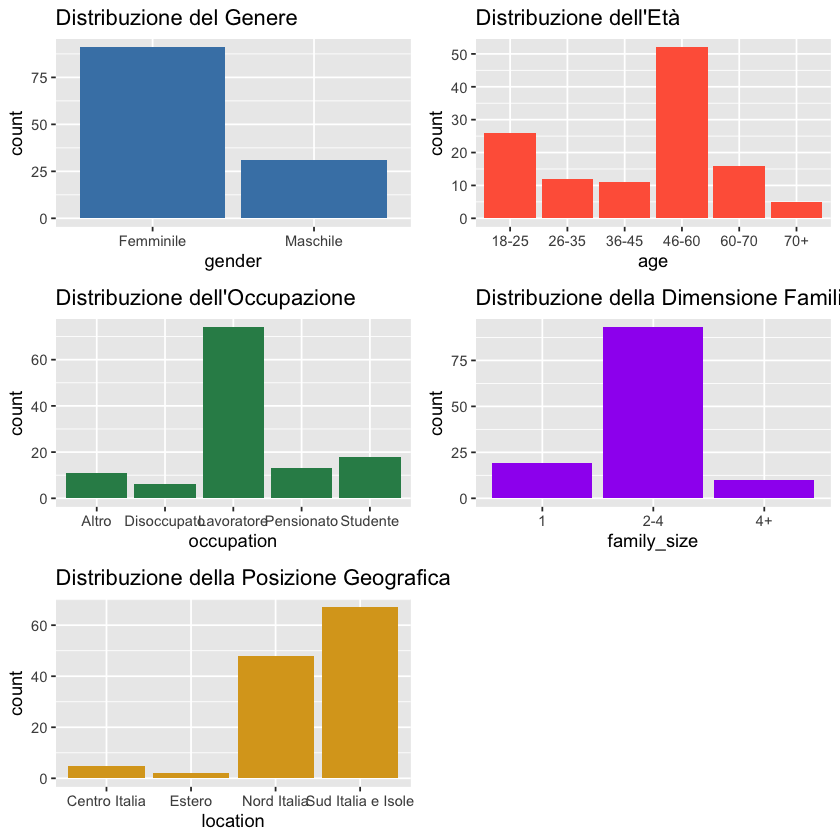

In [12]:
p1 <- ggplot(df, aes(x = gender)) +
  geom_bar(fill = "steelblue") +
  ggtitle("Distribuzione del Genere")

p2 <- ggplot(df, aes(x = age)) +
  geom_bar(fill = "tomato") +
  ggtitle("Distribuzione dell'Età")

p3 <- ggplot(df, aes(x = occupation)) +
  geom_bar(fill = "seagreen") +
  ggtitle("Distribuzione dell'Occupazione")

p4 <- ggplot(df, aes(x = family_size)) +
  geom_bar(fill = "purple") +
  ggtitle("Distribuzione della Dimensione Familiare")

p5 <- ggplot(df, aes(x = location)) +
  geom_bar(fill = "goldenrod") +
  ggtitle("Distribuzione della Posizione Geografica")

library(gridExtra)
grid.arrange(p1, p2, p3, p4, p5, ncol = 2)


In [13]:
#da aggiungere commento

#### **2.2.2 Consumption Habits**

**analizzare quelle che ha senso plottare per capire differenze**

---

#### **2.3. Potential Costumers**

We wanted to understand the **percentage of respondents who never eat fish or frozen fish**, as their answers do not provide valuable information for the conjoint analysis.

In [14]:
count_mai <- sum(survey_raw$fish_consumption_frequency == "Mai", na.rm = TRUE)
total_rows <- nrow(survey_raw)

percentage_mai <- (count_mai / total_rows) * 100

cat(sprintf("According to our data, the percentage of respondents who don't eat fish is %.2f%%\n", percentage_mai))

According to our data, the percentage of respondents who don't eat fish is 6.56%


In [15]:
count_nofrozen <- sum(survey_raw$frozen_fish_consumption_frequency == "Mai", na.rm = TRUE)
total_responses_frozen <- sum(survey_raw$fish_consumption_frequency != "Mai", na.rm = TRUE)

percentage_nofrozen <- (count_nofrozen / total_responses_frozen) * 100

cat(sprintf("The percentage of respondents who don't eat frozen fish is %.2f%%\n", percentage_nofrozen))

The percentage of respondents who don't eat frozen fish is 16.67%


In the survey, we added a question asking if they would consider consuming frozen fish under certain conditions and which:

_"A quali condizioni considereresti l'acquisto di prodotti di pesce surgelati?"_

In [16]:
unique_values_conditions <- unique(survey_raw$conditions_to_consume) 

unique_values_conditions

[1] ""                                                                                                                                          
 [2] "Se so che sono stati pescati "                                                                                                             
 [3] "Se mio marito non facesse lo schifiltoso"                                                                                                  
 [4] "Mai"                                                                                                                                       
 [5] "In luoghi lontani dal mare"                                                                                                                
 [6] "Solo se non riesco ad andare in pescheria per comprarlo fresco. Piuttosto faccio la scorta e me lo sporziono e lo congelo nel mio freezer "
 [7] "Se non abitassi in un posto di mare"                                                                                                       
 [8] "non lo considererei, sì solo ai bastoncini di pesce"                                                                                       
 [9] "?"                                                                                                                                         
[10] "In caso di emergenza"                                                                                                                      
[11] "Non li acquisterei mai "                                                                                                                   
[12] "Che sia congelato correttamente "                                                                                                          
[13] "Per fare pietanze cotte"                                                                                                                   
[14] "Non lo prendo in considerazione mai"                                                                                                       
[15] "Non lo mangerei mai surgelato "                                                                                                            
[16] "Mai, perché abito in una città sul mare"                                                                                                   
[17] "Per necessità urgente in mancanza di pescato"

In the sample, there are **no particular conditions for acquiring new potential customers**. However, it is important to note the significance of transparency towards the customer: some respondents state that they would buy frozen fish products if they were reassured about the origin and the freezing method of the product.

After obtaining these two results, we can compute the percentage of potential customers.

In [17]:
eat_fish <- total_rows * (1 - percentage_mai / 100)
potential_customers <- eat_fish * (1 - percentage_nofrozen / 100)
percentage_potential_customers <- round((potential_customers / total_rows) * 100, 2)

cat(sprintf("The percentage of potential customers is %.2f%% of the sample.\n", percentage_potential_customers))

The percentage of potential customers is 77.87% of the sample.


Also, we wanted to understand how many people would be willing to pay a higher price for frozen fish products characterized by high quality:

_"Tendi ad acquistare sempre il prodotto di pesce surgelato più economico?"_

In [18]:
count_cheapest <- sum(survey_raw$buy_cheapest_frozen_fish == "Sì", na.rm = TRUE)
percentage_cheapest <- (count_cheapest / total_responses_frozen) * 100

cat(sprintf("The percentage of people who always buy the cheapest option is %.2f%% of the sample.\n", percentage_cheapest))

The percentage of people who always buy the cheapest option is 21.05% of the sample.


This finding suggests that **price sensitivity** is a key factor in the market, as we already understood by segmentation analysis. 21,05% of our sample states that they always purchase the most affordable option.

If the company wants to attract customers who prioritize price, it must remain competitive by offering budget-friendly options or investing sufficiently in marketing to convince them that its products are worth the extra cost.


We also wanted to understand the reasons why a customer considers a particular brand to be their trusted brand:

_"Quali caratteristiche di una marca ti portano a sceglierla come la tua marca di fiducia?"_

In [19]:
unique_values_trust <- unique(survey_raw$reason_to_trust) 

unique_values_trust

[1] ""                                                          
 [2] "Gusto e convenienza "                                      
 [3] "Il sapore,la consistenza "                                 
 [4] "Capitan findus mio eroe "                                  
 [5] "Panatura che non si stacca"                                
 [6] "  La qualità la provenienza "                              
 [7] "L'affidabilità della marca"                                
 [8] "Qualità "                                                  
 [9] "La bontà "                                                 
[10] "La qualità "                                               
[11] "Sapore , facilità nel cucinare "                           
[12] "Marca conosciuta- provenienza del pesce"                   
[13] "Il pesce che venga surgelato entro 24 ore dalla pesca"     
[14] "Qualità"                                                   
[15] "Buona qualità "                                            
[16] "Il fatto che sia una marca storica"                        
[17] "Il tipo di pesce e scadenza "                              
[18] "La tradizione "                                            
[19] "Freschezza, data di scadenza"                              
[20] "Il sapore buono"                                           
[21] "Il sapore di mare che persiste nonostante il congelamento "
[22] "Il rapporto qualità prezzo "                               
[23] "Essere sul mercato da tantissimo tempo"                    
[24] "La bontà del prodotto"                                     
[25] "Certificazioni"                                            
[26] "Conoscerla da tempo "                                      
[27] "Zone di pesca, sapore"                                     
[28] "Il gusto"                                                  
[29] "La fama"                                                   
[30] "La qualità ed il sapore"                                   
[31] "Pesce abbattuto"                                           
[32] "La pulizia del pesce "                                     
[33] "App Yuca"

Based on the responses, "**quality**" and "**taste**" are frequently mentioned as key factors in choosing a trusted brand. This is a positive sign for our company, as two of its strengths are the high quality and excellent taste of its products. These attributes could serve as a strong foundation for building brand trust among potential new customers.

Another recurring theme is "**provenance**" of the fish, highlighting once again the importance of transparency: providing precise details on the origin of the fish could be a crucial factor in gaining consumers' trust.

After this initial analysis, we will consider only those who consume frozen fish to proceed with our work.

In [20]:
filtered_survey_raw <- survey_raw %>%
  filter(!(fish_consumption_frequency == 'Mai' | frozen_fish_consumption_frequency == 'Mai'))

In [21]:
#osservare caratteristiche demografiche dei nostri possibili consumers

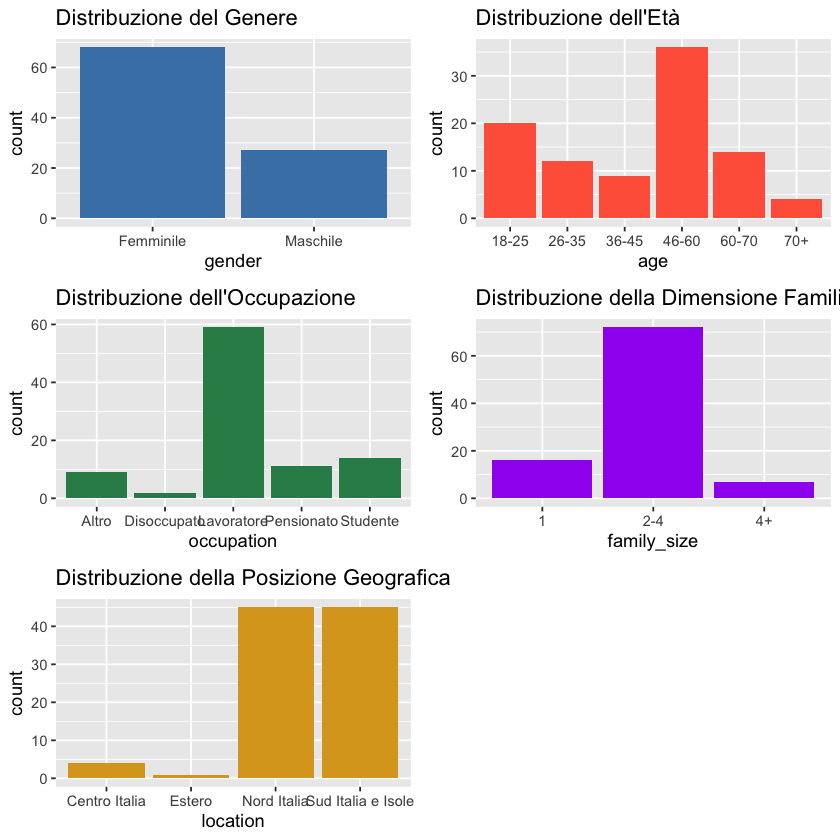

In [22]:
df2 <- filtered_survey_raw[, 1:5]
p1 <- ggplot(df2, aes(x = gender)) +
  geom_bar(fill = "steelblue") +
  ggtitle("Distribuzione del Genere")

p2 <- ggplot(df2, aes(x = age)) +
  geom_bar(fill = "tomato") +
  ggtitle("Distribuzione dell'Età")

p3 <- ggplot(df2, aes(x = occupation)) +
  geom_bar(fill = "seagreen") +
  ggtitle("Distribuzione dell'Occupazione")

p4 <- ggplot(df2, aes(x = family_size)) +
  geom_bar(fill = "purple") +
  ggtitle("Distribuzione della Dimensione Familiare")

p5 <- ggplot(df2, aes(x = location)) +
  geom_bar(fill = "goldenrod") +
  ggtitle("Distribuzione della Posizione Geografica")

library(gridExtra)
grid.arrange(p1, p2, p3, p4, p5, ncol = 2)

In [23]:
#fare considerazione come adesso nord italia sia maggiore, gender meno differenza, calo anche in 40-60 di età

---

## **3. Conjoint Analysis**

### **3.1 Dataset creation and adjustments**

We added an id for every respondent.

In [24]:
filtered_survey_raw <- filtered_survey_raw %>%
  mutate(id_respondent = 1:n())

We selected relevant columns for the conjoint analysis: id_respondent and the 18 bundles.

In [25]:
relevant_columns <- c(14:31, ncol(filtered_survey_raw))  
survey_data <- filtered_survey_raw[, relevant_columns]  

In [26]:
head(survey_data)

,Gambero_Nessuna_Nessuna_MenoDi8_Famiglia,Gambero_Nessuna_SalviaRosmarino_8-15_Doppia,Salmone_Nessuna_PrezzemoloBasilico_MenoDi8_Mono,Salmone_Nessuna_Nessuna_PiùDi15_Mono,Calamaro_Nessuna_PrezzemoloBasilico_8-15_Famiglia,Calamaro_Nessuna_SalviaRosmarino_PiùDi15_Doppia,Gambero_Panko_PrezzemoloBasilico_MenoDi8_Doppia,Gambero_Panko_Nessuna_PiùDi15_Famiglia,Salmone_Panko_SalviaRosmarino_8-15_Famiglia,Salmone_Panko_PrezzemoloBasilico_PiùDi15_Doppia,Calamaro_Panko_SalviaRosmarino_MenoDi8_Mono,Calamaro_Panko_Nessuna_8-15_Mono,Gambero_Gratinato_PrezzemoloBasilico_8-15_Mono,Gambero_Gratinato_SalviaRosmarino_PiùDi15_Mono,Salmone_Gratinato_SalviaRosmarino_MenoDi8_Famiglia,Salmone_Gratinato_Nessuna_8-15_Doppia,Calamaro_Gratinato_Nessuna_MenoDi8_Doppia,Calamaro_Gratinato_PrezzemoloBasilico_PiùDi15_Famiglia,id_respondent
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,4,5,3,2,4,3,9,6,7,9,8,2,8,7,2,8,3,4,1
2,8,8,6,7,8,6,8,8,7,7,10,9,8,8,7,8,10,9,2
3,5,9,10,7,0,6,10,2,0,8,4,2,10,10,1,8,3,0,3
4,10,8,6,5,8,7,8,10,9,7,6,6,5,5,9,7,7,9,4
5,6,7,6,5,8,8,6,8,6,6,8,6,7,6,7,5,8,8,5
6,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,6


The following steps aim to create the final dataset used for the conjoint analysis:

In [27]:
# Transformation of columns forease of analysis
columns_to_melt <- names(survey_data)[1:(ncol(survey_data) - 1)]  
columns_to_keep <- names(survey_data)[ncol(survey_data)] 

conjoint_data <- survey_data %>%
  pivot_longer(cols = all_of(columns_to_melt), 
               names_to = "Question", 
               values_to = "Rating") %>%
  arrange(id_respondent)

row.names(conjoint_data) <- NULL


#Split of preferred bundles in order to obtain different answers for each attribute of the bundle
split_columns <- strsplit(as.character(conjoint_data$Question), "_")

split_columns_df <- do.call(rbind, split_columns)
colnames(split_columns_df) <- c("Tipo_di_Pesce", "Panatura", "Spezie", "Tempo_di_Preparazione", "Formato_Confezione")

conjoint_data <- cbind(conjoint_data, split_columns_df)

conjoint_data$Question <- NULL


#The ratings transformed from 0-10 scale to a 0-100 scale for ease of analysis
conjoint_data$Rating <- conjoint_data$Rating * 10

In [28]:
# FINAL DATASET 
conjoint_data

id_respondent,Rating,Tipo_di_Pesce,Panatura,Spezie,Tempo_di_Preparazione,Formato_Confezione
<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
1,40,Gambero,Nessuna,Nessuna,MenoDi8,Famiglia
1,50,Gambero,Nessuna,SalviaRosmarino,8-15,Doppia
1,30,Salmone,Nessuna,PrezzemoloBasilico,MenoDi8,Mono
1,20,Salmone,Nessuna,Nessuna,PiùDi15,Mono
1,40,Calamaro,Nessuna,PrezzemoloBasilico,8-15,Famiglia
1,30,Calamaro,Nessuna,SalviaRosmarino,PiùDi15,Doppia
1,90,Gambero,Panko,PrezzemoloBasilico,MenoDi8,Doppia
1,60,Gambero,Panko,Nessuna,PiùDi15,Famiglia
1,70,Salmone,Panko,SalviaRosmarino,8-15,Famiglia


The table obtained above allows us to understand the rating given by each respondent for each combination of attributes proposed (=bundle). This will enable us to conduct the conjoint analysis, aiming to understand which characteristics consumers consider most relevant.

The average of total ratings is computed to have an idea of general evaluation of products.

In [29]:
mean(conjoint_data$Rating, na.rm = TRUE)

[1] 43.78947

We have observed that the average rating of the product in question is quite low (43) on a scale from 1 to 100. This could already serve as an indicator that the product may not be very appealing in the market for the consumers included in our survey sample. To better understand this, we plotted the distribution of ratings and the following graph clearly shows that there was a high percentage of ratings equal to 0 in the responses.

Warning message:
“The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead.”


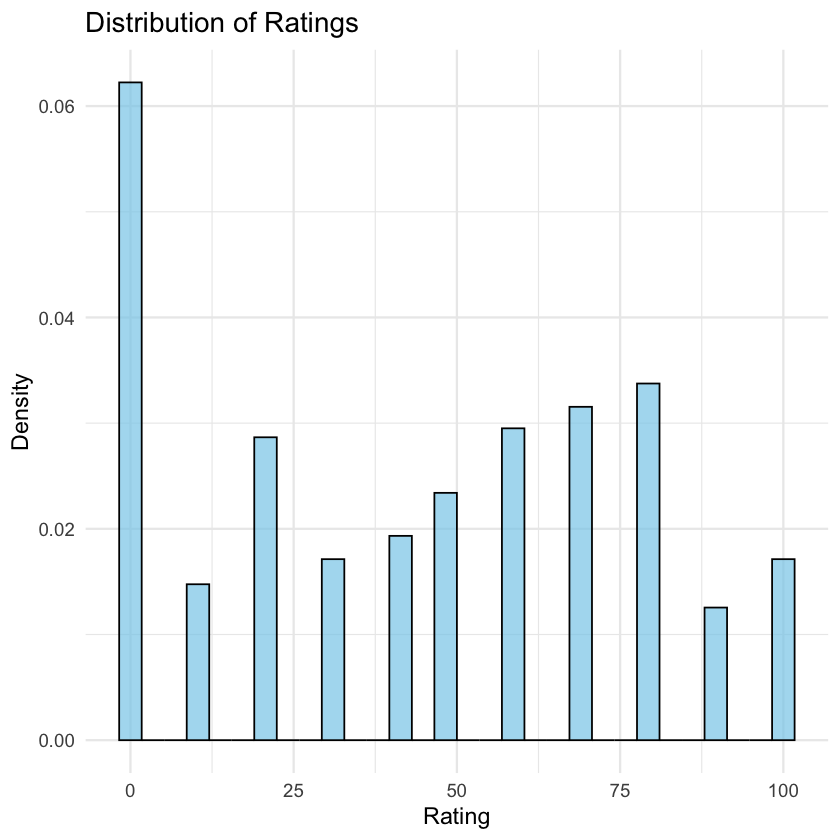

In [30]:
ggplot(conjoint_data, aes(x = Rating)) +
  geom_histogram(aes(y = ..density..), bins = 30, fill = "skyblue", color = "black", alpha = 0.7) +
  labs(title = "Distribution of Ratings",
       x = "Rating",
       y = "Density") +
  theme_minimal(base_size = 14)

---

### **3.2 Analysis**

#### **3.2.1 Single Respondent**

Initially, the conjoint function is applied to a single respondent, in order to obtain the relative importance of each attribute for that respondent. This step is used to validate the model and understand individual variability.

Additionally, it helps assess whether the analysis for a single respondent generates results that are consistent with the overall analysis. If the results are consistent, then the model is correctly set up.

In [31]:
set.seed(12)
random_num <- sample(1:95,1)
random_num

[1] 66

In [32]:
respondent <- conjoint_data %>% filter(id_respondent == random_num)
conjoint_respondent <- conjoint(respondent, rvar="Rating", evar=c("Tipo_di_Pesce", "Panatura", "Spezie", "Tempo_di_Preparazione", "Formato_Confezione"))
summary(conjoint_respondent)

Conjoint analysis
Data                 : respondent 
Response variable    : Rating 
Explanatory variables: Tipo_di_Pesce, Panatura, Spezie, Tempo_di_Preparazione, Formato_Confezione 

Conjoint part-worths:
            Attributes             Levels     PW
 Tipo_di_Pesce         Calamaro            0.000
 Tipo_di_Pesce         Gambero             8.333
 Tipo_di_Pesce         Salmone             6.667
 Panatura              Gratinato           0.000
 Panatura              Nessuna            -1.667
 Panatura              Panko              -3.333
 Spezie                Nessuna             0.000
 Spezie                PrezzemoloBasilico  3.333
 Spezie                SalviaRosmarino     1.667
 Tempo_di_Preparazione 8-15                0.000
 Tempo_di_Preparazione MenoDi8             1.667
 Tempo_di_Preparazione PiùDi15            -1.667
 Formato_Confezione    Doppia              0.000
 Formato_Confezione    Famiglia           -3.333
 Formato_Confezione    Mono               -1.667
 Base util

Visual representation of Respondent 66 relative preferences for each attribute:

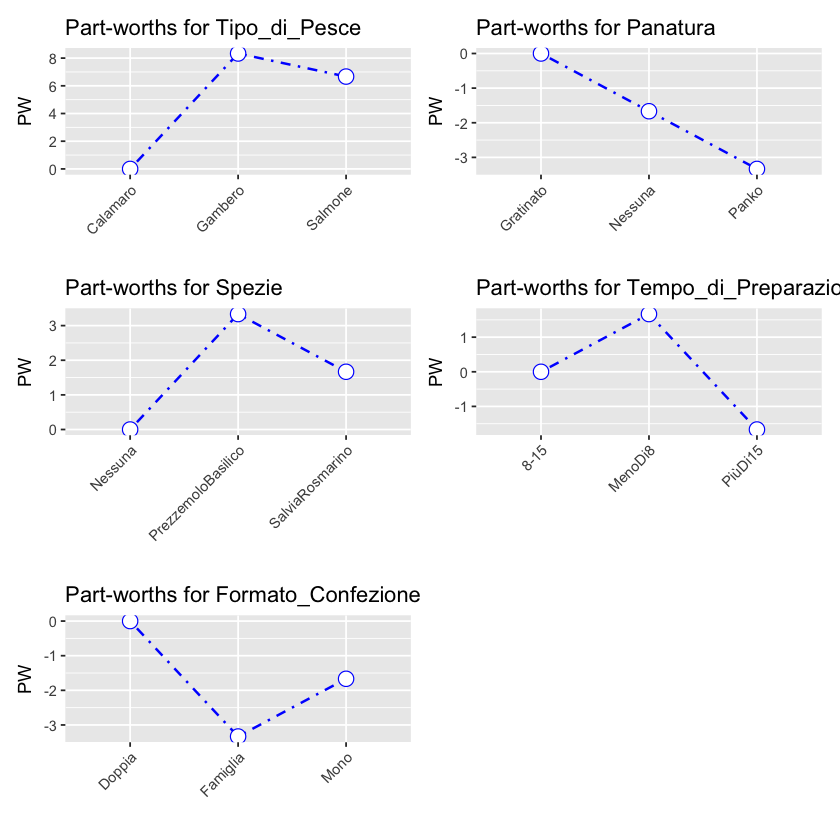

In [33]:
plot(conjoint_respondent)

The coefficients of the conjoint analysis represent the utility values assigned to different levels of each attribute relatively to the level with utility 0.

In this analysis, the level with utility 0 for "Tipo_di_Pesce" is "Calamaro", for "Panatura" is "Gratinato", for "Spezie" is "Nessuna", for "Tempo_di_Preparazione" is "8-15" and for "Formato_Confezione" is "Doppia", which gives a base utility of 1.667. 

From the results, the following considerations can be done:
The preferred type of fish is "Gambero", followed by "Salmone" and than "Calamaro". 
"Gratinato" is the preferred one, while "Nessuna Panatura" and "Panko" have a negative utility.
Same consideration for "Formato_Confezione", where "Doppia" is the preferred option.
Both "PrezzemoloBasilico" and "SalviaRosmarino" are preferred than "Nessuna Spezia" with the first level having the highest value.
The preferred "Tempo_di_Preparazione" is the "Meno di 8 min" while "Più di 15" has a value smaller than 0. 

#### **3.2.2 Total Conjoint**

Conversion of variables into factors, representing product features and their levels:

In [34]:
conjoint_data$Tipo_di_Pesce <- as.factor(conjoint_data$Tipo_di_Pesce)
conjoint_data$Panatura <- as.factor(conjoint_data$Panatura)
conjoint_data$Spezie <- as.factor(conjoint_data$Spezie)
conjoint_data$Tempo_di_Preparazione <- as.factor(conjoint_data$Tempo_di_Preparazione)
conjoint_data$Formato_Confezione<- as.factor(conjoint_data$Formato_Confezione)

In [35]:
conjoint_data

id_respondent,Rating,Tipo_di_Pesce,Panatura,Spezie,Tempo_di_Preparazione,Formato_Confezione
<int>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>
1,40,Gambero,Nessuna,Nessuna,MenoDi8,Famiglia
1,50,Gambero,Nessuna,SalviaRosmarino,8-15,Doppia
1,30,Salmone,Nessuna,PrezzemoloBasilico,MenoDi8,Mono
1,20,Salmone,Nessuna,Nessuna,PiùDi15,Mono
1,40,Calamaro,Nessuna,PrezzemoloBasilico,8-15,Famiglia
1,30,Calamaro,Nessuna,SalviaRosmarino,PiùDi15,Doppia
1,90,Gambero,Panko,PrezzemoloBasilico,MenoDi8,Doppia
1,60,Gambero,Panko,Nessuna,PiùDi15,Famiglia
1,70,Salmone,Panko,SalviaRosmarino,8-15,Famiglia


After evaluating the model for a single respondent, we conduct the analysis on the overall dataset, obtaining the average preference of each attribute.

In [36]:
conjoint_total <- conjoint(conjoint_data, rvar="Rating", evar=c("Tipo_di_Pesce", "Panatura", "Spezie", "Tempo_di_Preparazione", "Formato_Confezione"))

In [37]:
summary(conjoint_total)

Conjoint analysis
Data                 : conjoint_data 
Response variable    : Rating 
Explanatory variables: Tipo_di_Pesce, Panatura, Spezie, Tempo_di_Preparazione, Formato_Confezione 

Conjoint part-worths:
            Attributes             Levels     PW
 Tipo_di_Pesce         Calamaro            0.000
 Tipo_di_Pesce         Gambero             8.088
 Tipo_di_Pesce         Salmone             1.754
 Panatura              Gratinato           0.000
 Panatura              Nessuna            -0.667
 Panatura              Panko              -1.070
 Spezie                Nessuna             0.000
 Spezie                PrezzemoloBasilico  1.649
 Spezie                SalviaRosmarino     0.667
 Tempo_di_Preparazione 8-15                0.000
 Tempo_di_Preparazione MenoDi8             1.316
 Tempo_di_Preparazione PiùDi15             0.579
 Formato_Confezione    Doppia              0.000
 Formato_Confezione    Famiglia           -1.737
 Formato_Confezione    Mono               -4.737
 Base u

Visual representation of overall relative preferences for each attribute:

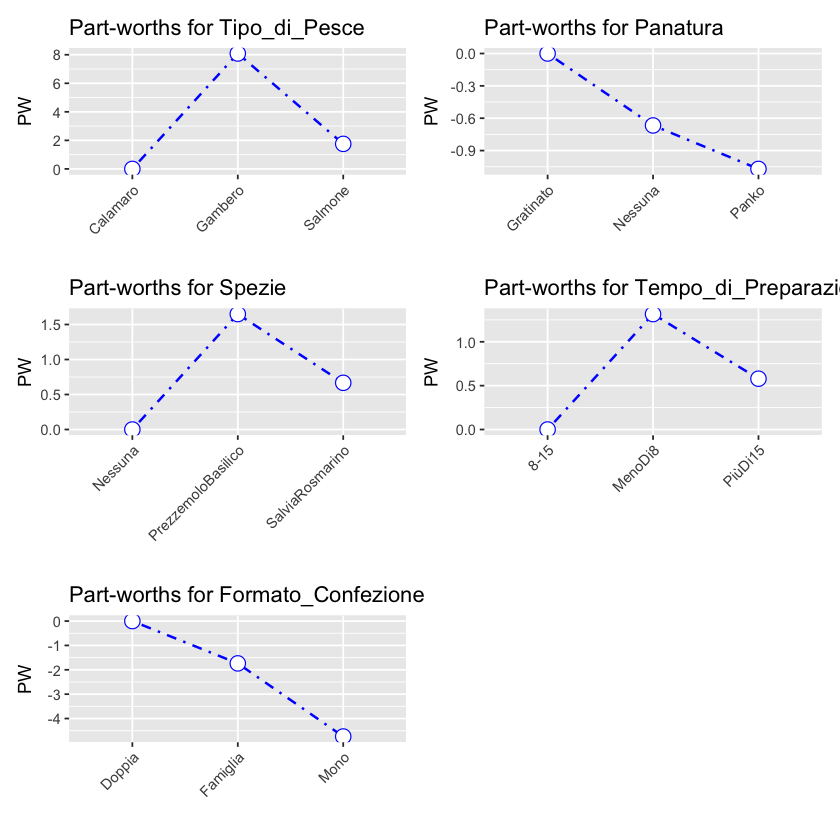

In [38]:
plot(conjoint_total)

After conducting the conjoint analysis on the entire set of respondents, we noticed that the base utility changes significantly. This could indicate that there is considerable variability in how different consumer segments value the product attributes. A large fluctuation in the base utility may suggest that the product's appeal is not uniform across all respondents, and it might be more appealing to some groups while less appealing to others.

All combinations of attributes are created:

In [39]:
profiles.all <- expand.grid(levels(conjoint_data$Tipo_di_Pesce),levels(conjoint_data$Panatura), levels(conjoint_data$Spezie), levels(conjoint_data$Tempo_di_Preparazione), levels(conjoint_data$Formato_Confezione))
profiles.all <- profiles.all %>% rename('Tipo_di_Pesce' = 'Var1', 'Panatura' = 'Var2' , 'Spezie' = 'Var3', 'Tempo_di_Preparazione' = 'Var4', 'Formato_Confezione' = 'Var5')
profiles.all

Tipo_di_Pesce,Panatura,Spezie,Tempo_di_Preparazione,Formato_Confezione
<fct>,<fct>,<fct>,<fct>,<fct>
Calamaro,Gratinato,Nessuna,8-15,Doppia
Gambero,Gratinato,Nessuna,8-15,Doppia
Salmone,Gratinato,Nessuna,8-15,Doppia
Calamaro,Nessuna,Nessuna,8-15,Doppia
Gambero,Nessuna,Nessuna,8-15,Doppia
Salmone,Nessuna,Nessuna,8-15,Doppia
Calamaro,Panko,Nessuna,8-15,Doppia
Gambero,Panko,Nessuna,8-15,Doppia
Salmone,Panko,Nessuna,8-15,Doppia


The rating for each combination is predicted:

In [40]:
conjoint_prediction <- predict(conjoint_total, profiles.all) %>% arrange(desc(Prediction))
conjoint_prediction

Tipo_di_Pesce,Panatura,Spezie,Tempo_di_Preparazione,Formato_Confezione,Prediction
<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>
Gambero,Gratinato,PrezzemoloBasilico,MenoDi8,Doppia,52.89474
Gambero,Nessuna,PrezzemoloBasilico,MenoDi8,Doppia,52.22807
Gambero,Gratinato,PrezzemoloBasilico,PiùDi15,Doppia,52.15789
Gambero,Gratinato,SalviaRosmarino,MenoDi8,Doppia,51.91228
Gambero,Panko,PrezzemoloBasilico,MenoDi8,Doppia,51.82456
Gambero,Gratinato,PrezzemoloBasilico,8-15,Doppia,51.57895
Gambero,Nessuna,PrezzemoloBasilico,PiùDi15,Doppia,51.49123
Gambero,Nessuna,SalviaRosmarino,MenoDi8,Doppia,51.24561
Gambero,Gratinato,Nessuna,MenoDi8,Doppia,51.24561


The highest rating results to be 52.89 for the following combination:

Spiedino di **gambero**, **Gratinato**, speziato al **prezzemolo e basilico**, pronto in **meno di 8 minuti** e venduto in **confezione doppia**.

The highest rating might be considered low, and there are several possible reasons for this:

1. *Market Appeal*: The product (fish skewer) might not be highly appealing to our sample of consumers, as indicated by the low base utility and the distribution of ratings in the conjoint analysis. 
   
2. *Attribute Importance*: The attributes considered in the conjoint model might not be significant enough to drive high preference. If the chosen attributes do not strongly influence the decision-making process of consumers, the predicted score will be lower.

3. *Consumer Segmentation*: A lack of differentiation among consumer segments in terms of their preferences could lead to lower predicted scores, as the conjoint model may not capture distinct consumer needs and behaviors effectively.


To complete this part of the analysis, we aimed to evaluate the actual product combinations offered by MarePiù to B2B customers and assess their scores. Our objective is to determine which combination of attributes is the best, helping us identify the most viable product to launch on the market.  

After establishing that the **"Gratinated Shrimp Skewer with Parsley and Basil, sold in a double pack and ready in less than 8 minutes"** is generally the best combination, we also want to explore cost-saving opportunities. Specifically, we aim to identify existing B2B products that could be repurposed for the market, reducing production costs.  

To determine which products are already available, we referred to MarePiù’s official website at the following link:  
[Catalog - MarePiù Food Service](https://www.marepiusrl.com/catalogo-food-service/) 

In [41]:
find_rating <- function(tipo, panatura, spezie, tempo, formato) {
  filtro <- conjoint_prediction[conjoint_prediction$Tipo_di_Pesce == tipo &
                 conjoint_prediction$Panatura == panatura &
                 conjoint_prediction$Spezie == spezie &
                 conjoint_prediction$Tempo_di_Preparazione == tempo &
                 conjoint_prediction$Formato_Confezione == formato, ]
  
  if (nrow(filtro) == 0) {
    return("Nessuna corrispondenza trovata.")
  }
  
  punteggio <- filtro$Prediction
  classifica <- rank(-conjoint_prediction$Prediction) 
  posizione <- classifica[conjoint_prediction$Prediction == punteggio]
  totale <- nrow(conjoint_prediction)
  
  return(paste("Rating:", punteggio, "- Position:", posizione, "out of", totale))
}

Based on the results of the conjoint analysis, where the **"Double"** format consistently achieved the highest scores, we will consider this format as the standard for all other attribute combinations moving forward.

- <a href="https://www.marepiusrl.com/portfolio-item/salmone-allo-spiedo-con-panko-alle-erbe-aromatiche/" style="color:black;">SALMONE ALLO SPIEDO CON PANKO ALLE ERBE AROMATICHE</a>


In [42]:
find_rating("Salmone", "Panko", "SalviaRosmarino", "MenoDi8", "Doppia")

[1] "Rating: 44.5087719298247 - Position: 95 out of 243"

- <a href="https://www.marepiusrl.com/portfolio-item/spiedino-di-gambero-argentino-sgusciato-gratinato/" style="color:black;">SPIEDINO DI GAMBERO ARGENTINO SGUSCIATO GRATINATO</a>

In [43]:
find_rating("Gambero", "Gratinato", "PrezzemoloBasilico", "MenoDi8", "Doppia")

[1] "Rating: 52.8947368421056 - Position: 1 out of 243"

In [44]:
#commentare che quella che risulta la best optimal combinazione di attributi è in realtà gia prodotta dall'azienda???

- <a href="https://www.marepiusrl.com/portfolio-item/spiedino-di-filetto-di-calamaro-gratinato/" style="color:black;">SPIEDINO DI FILETTO DI CALAMARO PATAGONICO GRATINATO</a>

In [45]:
find_rating("Calamaro", "Gratinato", "PrezzemoloBasilico", "8-15", "Doppia")

[1] "Rating: 43.4912280701755 - Position: 116 out of 243"

- <a href="https://www.marepiusrl.com/portfolio-item/arrosticini-di-salmone-gratinati/" style="color:black;">ARROSTICINI DI SALMONE GRATINATI</a>

In [46]:
find_rating("Salmone", "Gratinato", "PrezzemoloBasilico", "8-15", "Doppia")

[1] "Rating: 45.2456140350878 - Position: 80 out of 243"

- <a href="https://www.marepiusrl.com/portfolio-item/spiedino-di-gambero-argentina/" style="color:black;">SPIEDINO DI GAMBERO ARGENTINO SGUSCIATO</a>

In [47]:
find_rating("Gambero", "Nessuna", "Nessuna", "MenoDi8", "Doppia")

[1] "Rating: 50.5789473684214 - Position: 16 out of 243"

- <a href="https://www.marepiusrl.com/portfolio-item/spiedino-di-calamro-patagonia-rustico-xl/" style="color:black;">SPIEDINO DI CALAMARO PATAGONICO RUSTICO</a>

In [48]:
find_rating("Calamaro", "Nessuna", "Nessuna", "8-15", "Doppia")

[1] "Rating: 41.1754385964914 - Position: 172 out of 243"

#### **3.2.3 Attributes' Influences**

In our survey, we asked respondents which factors they considered most important when making their choice, and we compared these results with the importance weights of the attributes obtained from the conjoint analysis.

In [49]:
conjoint_weights <- data.frame(
  major_influences = c("Tipo_di_Pesce", "Panatura", "Spezie", "Tempo_di_Preparazione", "Formato_Confezione"),
  IW = c(0.480, 0.063, 0.098, 0.078, 0.281)
)
conjoint_weights

major_influences,IW
<chr>,<dbl>
Tipo_di_Pesce,0.480
Panatura,0.063
Spezie,0.098
Tempo_di_Preparazione,0.078
Formato_Confezione,0.281


In [50]:
influences <- survey_raw %>%
  select(major_influences) %>%            
  separate_rows(major_influences, sep = ";") %>%  
  count(major_influences, sort = TRUE) %>%   
  mutate(percentuale = round(n / sum(n) * 100, 2))  
influences <- influences %>%
  slice(-n())
influences

major_influences,n,percentuale
<chr>,<int>,<dbl>
Tipo di pesce utilizzato per lo spiedino surgelato,65,28.63
Presenza e tipo di panatura,52,22.91
Formato confezione,36,15.86
Presenza e combinazione di spezie,33,14.54
,28,12.33


The findings were as follows:

- *Fish Type*: The most relevant attribute for consumers when making their choice, which is also confirmed by the conjoint analysis.
  
- *Panatura*: This was ranked as the second most important factor by consumers. However, the conjoint results do not confirm this and, in fact, it was considered the least important attribute.

- *Packaging Format, Spices, and Cooking Time*: According to consumers, these were the least relevant factors in their decision-making process. This result is also validated by the conjoint analysis.

# **WORK IN PROGRESS**

### **3.3 Market Shares**

Building on the previous analysis, we now aim to evaluate the hypothetical market share that different products currently available within the company would achieve if launched in the market.

In [51]:
#Market Share Estimation with Choice-Based Conjoint (CBC)

In [52]:
#Market shares using the share-of-preference rule

In [53]:
profiles <- profiles.all %>% slice(c(4,10,12,32,38,54))
profiles

Tipo_di_Pesce,Panatura,Spezie,Tempo_di_Preparazione,Formato_Confezione
<fct>,<fct>,<fct>,<fct>,<fct>
Calamaro,Nessuna,Nessuna,8-15,Doppia
Calamaro,Gratinato,PrezzemoloBasilico,8-15,Doppia
Salmone,Gratinato,PrezzemoloBasilico,8-15,Doppia
Gambero,Nessuna,Nessuna,MenoDi8,Doppia
Gambero,Gratinato,PrezzemoloBasilico,MenoDi8,Doppia
Salmone,Panko,SalviaRosmarino,MenoDi8,Doppia


In [54]:
predict(conjoint_total, profiles) %>% arrange(desc(Prediction)) %>% mutate(Perc=Prediction/sum(Prediction)*100)

Tipo_di_Pesce,Panatura,Spezie,Tempo_di_Preparazione,Formato_Confezione,Prediction,Perc
<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>
Gambero,Gratinato,PrezzemoloBasilico,MenoDi8,Doppia,52.89474,19.03409
Gambero,Nessuna,Nessuna,MenoDi8,Doppia,50.57895,18.20076
Salmone,Gratinato,PrezzemoloBasilico,8-15,Doppia,45.24561,16.28157
Salmone,Panko,SalviaRosmarino,MenoDi8,Doppia,44.50877,16.01641
Calamaro,Gratinato,PrezzemoloBasilico,8-15,Doppia,43.49123,15.65025
Calamaro,Nessuna,Nessuna,8-15,Doppia,41.17544,14.81692


In [56]:
##################################################################################

In [57]:
#Suppose we are currently considering whether to introduce the spiedino con maggiore utilità: gambero gratinato etc in un mercato con competitors

In [58]:
#fingiamo che sul mercato al momento esistano:

In [59]:
set.seed(12)
random_num2 <- sample(1:243,2)
random_num2

[1] 194  90

In [60]:
competitor_profiles <- profiles.all %>% slice(c(random_num2))
rownames(competitor_profiles) <- c("Prod A","Prod B") 

In [61]:
competitor_profiles

,Tipo_di_Pesce,Panatura,Spezie,Tempo_di_Preparazione,Formato_Confezione
,<fct>,<fct>,<fct>,<fct>,<fct>
Prod A,Gambero,Nessuna,Nessuna,MenoDi8,Mono
Prod B,Salmone,Panko,Nessuna,8-15,Famiglia


In [62]:
predict(conjoint_total, competitor_profiles) %>% arrange(desc(Prediction)) %>% mutate(Perc=Prediction/sum(Prediction)*100)

,Tipo_di_Pesce,Panatura,Spezie,Tempo_di_Preparazione,Formato_Confezione,Prediction,Perc
,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>
Prod A,Gambero,Nessuna,Nessuna,MenoDi8,Mono,45.84211,52.91616
Prod B,Salmone,Panko,Nessuna,8-15,Famiglia,40.78947,47.08384


In [63]:
#Suppose we are currently considering whether to introduce the following product (best for our company)

In [64]:
profiles.all %>% slice(c(38))

Tipo_di_Pesce,Panatura,Spezie,Tempo_di_Preparazione,Formato_Confezione
<fct>,<fct>,<fct>,<fct>,<fct>
Gambero,Gratinato,PrezzemoloBasilico,MenoDi8,Doppia


In [65]:
#We want to estimate the potential market share obtainable in the given competitive scenario

In [66]:
market_sim <- profiles.all %>% slice(c(random_num2, 38))
rownames(market_sim) <- c("Prod A","Prod B","Prod MarePiù") 

market_sim

,Tipo_di_Pesce,Panatura,Spezie,Tempo_di_Preparazione,Formato_Confezione
,<fct>,<fct>,<fct>,<fct>,<fct>
Prod A,Gambero,Nessuna,Nessuna,MenoDi8,Mono
Prod B,Salmone,Panko,Nessuna,8-15,Famiglia
Prod MarePiù,Gambero,Gratinato,PrezzemoloBasilico,MenoDi8,Doppia


In [67]:
predict(conjoint_total, market_sim) %>% arrange(desc(Prediction)) %>% mutate(Perc=Prediction/sum(Prediction)*100)

,Tipo_di_Pesce,Panatura,Spezie,Tempo_di_Preparazione,Formato_Confezione,Prediction,Perc
,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>
Prod MarePiù,Gambero,Gratinato,PrezzemoloBasilico,MenoDi8,Doppia,52.89474,37.91022
Prod A,Gambero,Nessuna,Nessuna,MenoDi8,Mono,45.84211,32.85553
Prod B,Salmone,Panko,Nessuna,8-15,Famiglia,40.78947,29.23425


In [68]:
##############################################

In [69]:
#Market shares using the first-choice rule

In [70]:
?conjoint

In [71]:
conjoint_byrespondent <- conjoint(conjoint_data,
                                   rvar = "Rating",
                                   evar = c("Tipo_di_Pesce",'Panatura', 'Spezie', 'Tempo_di_Preparazione','Formato_Confezione'),
                                   by = "id_respondent")

Warning message in summary.lm(x):
“essentially perfect fit: summary may be unreliable”


ERROR: Error in colSums(.): 'x' must be an array of at least two dimensions


In [73]:
############################################

In [72]:
conjoint_data

id_respondent,Rating,Tipo_di_Pesce,Panatura,Spezie,Tempo_di_Preparazione,Formato_Confezione
<int>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>
1,40,Gambero,Nessuna,Nessuna,MenoDi8,Famiglia
1,50,Gambero,Nessuna,SalviaRosmarino,8-15,Doppia
1,30,Salmone,Nessuna,PrezzemoloBasilico,MenoDi8,Mono
1,20,Salmone,Nessuna,Nessuna,PiùDi15,Mono
1,40,Calamaro,Nessuna,PrezzemoloBasilico,8-15,Famiglia
1,30,Calamaro,Nessuna,SalviaRosmarino,PiùDi15,Doppia
1,90,Gambero,Panko,PrezzemoloBasilico,MenoDi8,Doppia
1,60,Gambero,Panko,Nessuna,PiùDi15,Famiglia
1,70,Salmone,Panko,SalviaRosmarino,8-15,Famiglia


In [78]:
avg_rating <- conjoint_data %>%
  group_by(id_respondent) %>%
  summarise(average_rating = mean(Rating, na.rm = TRUE)) %>%
  arrange(average_rating)

In [79]:
avg_rating

id_respondent,average_rating
<int>,<dbl>
16,0.000000
42,0.000000
54,0.000000
62,0.000000
79,0.000000
90,0.000000
9,2.222222
61,4.444444
76,4.444444


In [98]:
df_filtered <- conjoint_data %>%
  group_by(id_respondent) %>%
  summarise(average_rating = mean(Rating, na.rm = TRUE)) %>%
  filter(average_rating > 35) %>%
  arrange(desc(average_rating))

In [99]:
#eliminiamo coloro che hanno una media voti minore di 15, ovvero che in generale non acquisterebbero nessuna delle nostre 
#combinazioni di prodotti e quinsi non è probabilemnte il nostro targe

In [100]:
conjoint_data2 <- conjoint_data %>%
  semi_join(df_filtered, by = "id_respondent") 

In [101]:
conjoint_data2$Tipo_di_Pesce <- as.factor(conjoint_data2$Tipo_di_Pesce)
conjoint_data2$Panatura <- as.factor(conjoint_data2$Panatura)
conjoint_data2$Spezie <- as.factor(conjoint_data2$Spezie)
conjoint_data2$Tempo_di_Preparazione <- as.factor(conjoint_data2$Tempo_di_Preparazione)
conjoint_data2$Formato_Confezione<- as.factor(conjoint_data2$Formato_Confezione)

In [102]:
conjoint_total2 <- conjoint(conjoint_data2, rvar="Rating", evar=c("Tipo_di_Pesce", "Panatura", "Spezie", "Tempo_di_Preparazione", "Formato_Confezione"))

In [103]:
summary(conjoint_total2)

Conjoint analysis
Data                 : conjoint_data2 
Response variable    : Rating 
Explanatory variables: Tipo_di_Pesce, Panatura, Spezie, Tempo_di_Preparazione, Formato_Confezione 

Conjoint part-worths:
            Attributes             Levels     PW
 Tipo_di_Pesce         Calamaro            0.000
 Tipo_di_Pesce         Gambero             7.356
 Tipo_di_Pesce         Salmone             1.207
 Panatura              Gratinato           0.000
 Panatura              Nessuna            -5.057
 Panatura              Panko              -0.000
 Spezie                Nessuna             0.000
 Spezie                PrezzemoloBasilico  3.017
 Spezie                SalviaRosmarino     2.011
 Tempo_di_Preparazione 8-15                0.000
 Tempo_di_Preparazione MenoDi8             0.517
 Tempo_di_Preparazione PiùDi15             2.098
 Formato_Confezione    Doppia              0.000
 Formato_Confezione    Famiglia           -2.960
 Formato_Confezione    Mono               -5.718
 Base 

In [104]:
conjoint_prediction2 <- predict(conjoint_total2, profiles.all) %>% arrange(desc(Prediction))
conjoint_prediction2

Tipo_di_Pesce,Panatura,Spezie,Tempo_di_Preparazione,Formato_Confezione,Prediction
<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>
Gambero,Gratinato,PrezzemoloBasilico,PiùDi15,Doppia,72.43295
Gambero,Panko,PrezzemoloBasilico,PiùDi15,Doppia,72.43295
Gambero,Gratinato,SalviaRosmarino,PiùDi15,Doppia,71.42720
Gambero,Panko,SalviaRosmarino,PiùDi15,Doppia,71.42720
Gambero,Gratinato,PrezzemoloBasilico,MenoDi8,Doppia,70.85249
Gambero,Panko,PrezzemoloBasilico,MenoDi8,Doppia,70.85249
Gambero,Gratinato,PrezzemoloBasilico,8-15,Doppia,70.33525
Gambero,Panko,PrezzemoloBasilico,8-15,Doppia,70.33525
Gambero,Gratinato,SalviaRosmarino,MenoDi8,Doppia,69.84674


In [89]:
#con >15 migliora già arrivando a 60

In [97]:
#con >25 arriva a 65

In [105]:
#con 35 a 72

In [106]:
#ha senso fare sta roba???

In [107]:
############################à

In [108]:
#fare prove con choice based sondaggio???

### **3.4.Choice-Based Conjoint Analysis**


In our previous study, we conducted a **Rating-Based Conjoint Analysis** (RBC) to evaluate consumer preferences. While this method provided valuable insights, it has certain limitations, particularly in capturing real-world decision-making behavior. To enhance the robustness of our findings, we are now exploring the use of Choice-Based Conjoint Analysis (CBC).



#### **3.4.1. Survey Design and Data Collection**

The survey design for the Choice-Based Conjoint (CBC) Analysis was developed using **Sawtooth Software**, ensuring a structured approach. To maintain consistency and facilitate comparison with the previous Rating-Based Conjoint (RBC) study, we retained the **same attributes and levels**.

Sawtooth recommended selecting **between 11 and 17 choice tasks**, and we opted for *12*, balancing respondent engagement and data robustness. Additionally, we set each task to include **3 choice alternatives**, a common practice that helps simulate realistic decision-making without overwhelming participants.

This is an example of how the survey looks:


![Esempio Survey](images/surveyCBC.jpeg)


For this CBC section, we relied on a convenience sample consisting of our survey designers and a few acquaintances, resulting in **21 responses**. This approach was not intended for drawing definitive conclusions but rather to assess the efficiency of the method and evaluate its feasibility for future studies.



#### **3.4.3. Analysis of Results**

At first, we exported the summary of **utility** for each level of each attribute.



In [77]:
utilityCBC <- read_excel("CBC/CBC1_Attribute_Summary.xlsx")
utilityCBC

Attribute #,Attribute,Level #,Level,Utility
<dbl>,<chr>,<dbl>,<chr>,<dbl>
1,Panatura,1,Nessuna,-39.684014
NA,NA,2,Panko,14.873072
NA,NA,3,Gratinati,24.810942
2,Tipo di pesce,1,Gambero,19.805719
NA,NA,2,Salmone,14.759057
NA,NA,3,Calamaro,-34.564776
3,Tempo di preparazione (in minuti),1,Meno di 8,33.536479
NA,NA,2,Tra 8 e 15,15.278062
NA,NA,3,Più di 15,-48.814542


...commento confronto con RBC...